___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [46]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
import numpy as np


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

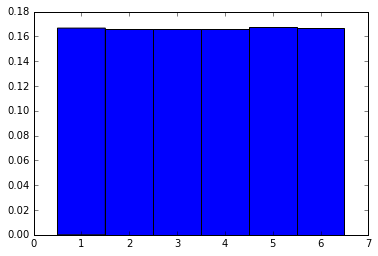

In [49]:
resultadojogadas = []
for i in range(1000000):
    resultadojogadas.append(randint(1,7))
faixas = np.arange(0.5,7,1)
plt.hist(resultadojogadas,normed=True,bins=faixas)
plt.show()

**a)** pode-se observar que elas não possuem a mesma frequência

**b)** Por que apesar de aparentemente aleatória, a sequência segue um algoritmo que se traduz em um padrão que não é verdadeiramente aleatório


___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [61]:
freqsoma = []
for i in range(1000):
    resultadod1 = randint(1,7)
    resultadod2 = randint(1,7)
    soma = resultadod1 + resultadod2
    if soma == 7:
        freqsoma.append(1)
    else:
        freqsoma.append(0)
        
#plt.hist(resultadojogadas,normed=True)
#plt.show()

In [62]:
probabilidade = freqsoma.count(1)*100/len(freqsoma)
print("a) A probabilidade fica em torno de",probabilidade,"%")

a) A probabilidade fica em torno de 14.9 %


In [63]:
freqsoma2 = []
for i in range(2000):
    resultadod3 = 6 #numero aleatório
    resultadod4 = randint(1,7)
    soma = resultadod3 + resultadod4
    if soma == 7:
        freqsoma2.append(1)
    else:
        freqsoma2.append(0)
        
probabilidade = freqsoma.count(1)*100/len(freqsoma)
print("A probabilidade fica em torno de",probabilidade,"%")

A probabilidade fica em torno de 14.9 %


**b)** A probabilidade é exatamente igual, pois o evento trata-se uma probabilidade condicional, na qual a ocorrência de um evento não interfere na probabilidade da ocorrência do outro. Por mérito de cálculo, P(B|A) = P(B).P(A) / P(A)

___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

In [ ]:
ganhou = []
perdeu = []
for i in range(10000):
    portas = [1,2,3]
    portapremiada = choice(portas)
    portaescolhida = choice(portas)
    if portaescolhida == portapremiada:
        portas.remove(portapremiada)
        portaaberta = choice(portas)
        perdeu.append("perdeu")
    elif portaescolhida != portapremiada:
        portas.remove(portapremiada)
        portas.remove(portaescolhida)
        portaaberta = choice(portas)
        ganhou.append("ganhou")

In [45]:
len(ganhou)/100

66.73